In [1]:
#To load libraries python
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from scipy.spatial import distance
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#If are google colab: Download photos .zip folder into content and to run this script
# extract the data from the archive
# archive_name = "/content/ORL.zip"
!unzip '/content/ORL' -d '/content/'

In [2]:
#Source of photos (faces)
# path = "lfw"
path = "ORL"

In [3]:
#Function to map folder and output list with all files
def files_in_folder(path):
    files = []
    for dirname, _, filenames in os.walk(path):
        # for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            # print(os.path.join(dirname, filename))
            files.append(os.path.join(dirname, filename))
    return files

In [4]:
# To check and to see file format
files = files_in_folder(path); #files

In [5]:
#Test split for testing in foward function
# 'ORL\\96_10.jpg'.split('\\')[-1].split('_')[1]

In [6]:
#To read and preprocessing imagens into array
def readImages (list):
    # Leitura das imagens
    # imgs = glob.glob(path+'/*.'+extension)
    imgs = list
    base = [Image.open(i).convert('L') for i in imgs]
    
    # Tamanho do dataset
    size = len(base)
    
    
    # Passar as imagens para um array
    X = np.array([base[i].getdata() for i in range(size)])
    return X, base, size

In [7]:
X, _,_ = readImages(files); X

array([[100, 118, 111, ...,  21,  20,  21],
       [ 34,  42,  40, ...,  26,  32,  25],
       [ 36,  41,  39, ...,  29,  30,  28],
       ...,
       [107, 117, 113, ...,  15,  17,  18],
       [102, 124, 113, ...,  16,  17,  16],
       [ 30,  38,  41, ...,  35,  39,  31]])

In [8]:
# X.shape

In [9]:
y = [ i.split('_')[-1].split('.')[0] for i in files ];len(y)
    

410

In [10]:
df = pd.DataFrame(X); df

,0,1,2,3,4,5,6,7,8,9,...,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599
0,100,118,111,115,113,109,110,116,112,107,...,17,28,35,21,19,18,20,21,20,21
1,34,42,40,41,42,40,43,41,42,40,...,21,25,21,27,28,26,29,26,32,25
2,36,41,39,41,42,39,42,42,44,40,...,83,109,138,177,147,26,27,29,30,28
3,39,42,44,43,43,42,41,41,43,41,...,146,28,22,28,25,26,27,28,28,27
4,36,41,39,38,44,44,41,43,37,23,...,75,121,174,70,15,21,25,25,26,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,100,123,115,116,115,116,114,117,115,114,...,17,21,22,25,22,25,19,10,14,15
406,104,122,113,118,113,109,115,116,117,115,...,17,15,20,18,27,37,30,34,67,59
407,107,117,113,118,112,117,120,111,119,116,...,25,25,15,16,16,14,13,15,17,18
408,102,124,113,117,116,115,116,113,117,119,...,15,17,20,11,16,15,15,16,17,16


In [11]:
df['Class'] = y; df

,0,1,2,3,4,5,6,7,8,9,...,5591,5592,5593,5594,5595,5596,5597,5598,5599,Class
0,100,118,111,115,113,109,110,116,112,107,...,28,35,21,19,18,20,21,20,21,10
1,34,42,40,41,42,40,43,41,42,40,...,25,21,27,28,26,29,26,32,25,11
2,36,41,39,41,42,39,42,42,44,40,...,109,138,177,147,26,27,29,30,28,11
3,39,42,44,43,43,42,41,41,43,41,...,28,22,28,25,26,27,28,28,27,11
4,36,41,39,38,44,44,41,43,37,23,...,121,174,70,15,21,25,25,26,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,100,123,115,116,115,116,114,117,115,114,...,21,22,25,22,25,19,10,14,15,10
406,104,122,113,118,113,109,115,116,117,115,...,15,20,18,27,37,30,34,67,59,10
407,107,117,113,118,112,117,120,111,119,116,...,25,15,16,16,14,13,15,17,18,10
408,102,124,113,117,116,115,116,113,117,119,...,17,20,11,16,15,15,16,17,16,10


In [12]:
# X = df.iloc[:,:-1]

In [13]:
#Function for calculating inverse penrose and contructing the procruste problem
def procrustes(X, path):
    """
    Calcule inversa penrose e monta matriz B referente abordagem procrustes
    """
    B = np.ones([X.shape[0], X.shape[0]])
    lines = path
    cols  = path
    lin = 0
    for i in lines:
        col = 0
        for j in cols:   
            # print((i,j), (lin, col), i.split('\\')[-1].split('_')[:2] == j.split('\\')[-1].split('_')[:2] )  #teste output       
            #lfw test
            # if i.split('\\')[-1].split('_')[:2] == j.split('\\')[-1].split('_')[:2]:
            #OLR test
            # if i.split('\\')[-1].split('_')[1] == j.split('\\')[-1].split('_')[1]:
            if i == j:
                # print((i,j), i.split('\\')[-1].split('_')[:2] == j.split('\\')[-1].split('_')[:2] )
                B[lin, col] = 0
            col = col + 1
        lin = lin + 1
    return np.dot(np.linalg.pinv(X), B), B

In [14]:
X_Train, X_Test, y_Train, y_Test, indices_Train, indices_Test, = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], np.arange(df.shape[0]), test_size=0.2, stratify=y )

In [15]:
# Q, B = procrustes(X, files)
Q, B = procrustes(X_Train, y_Train)

In [16]:
def predictprocrutes(Q, B, ind):
    diff = []   
    for i in range(B.shape[0]):
        diff.append(np.linalg.norm(B[i,:] - np.dot(np.asarray(X_Test.loc[ind]).reshape(1,5600), Q)))  #Euclidean norm
        # print(diff.append(i, np.linalg.norm(B[i,:] - np.dot(np.asarray(X_Test.loc[ind]).reshape(1,5600), Q))) )
        # diff.append(distance.chebyshev(B[i,:], np.dot(np.asarray(X_Test.loc[ind]).reshape(1,5600), Q)))  
        

    #To show images Train + Test
    pil_im = X_Train.iloc[np.argmin(diff),:]
    plt.imshow(np.concatenate((np.asarray(pil_im).reshape(80, 70),np.asarray(X_Test.loc[ind]).reshape(80, 70)), axis = 1), cmap='gray')  #Test.reshape(80,70) (np.asarray(pil_im)[:,:,0]
    plt.xlabel("Dataset(train) ... >>> || >>> ... Test")
    plt.show()
    # result = y_Train[X_Train[X_Train.iloc[np.argmin(diff), :]== X_Train].dropna().index[0]]  #OK_vers.01
    result = y_Train[X_Train.iloc[np.argmin(diff)].name]   #OK_vers.02
    # print(y_Train[X_Train.iloc[np.argmin(diff)].name], y_Test[ind])
    print(result == y_Test[ind])
    return result

In [17]:
# diff=[]
# for i in indices_Train:
        # print(i, diff.append(np.linalg.norm(B[i,:] - np.dot(np.asarray(X_Test.loc[69]).reshape(1,5600), Q)))) 

In [18]:
# y_Train[X_Train[X_Train.loc[296]== X_Train].dropna().index[0]]

In [19]:
# predictprocrutes(Q, B, _____)

In [20]:
#To run X_Test and check accuracy model and to see impact of test size (0.4, 0.3, 0.25, 0.2, 0.1)
# for test_size in [0.5, 0.4, 0.3, 0.25, 0.2, 0.1]:
#     X_Train, X_Test, y_Train, y_Test, indices_Train, indices_Test, = train_test_split(
#                                                                                     df.iloc[:,:-1], 
#                                                                                     df.iloc[:,-1], 
#                                                                                     np.arange(df.shape[0]), 
#                                                                                     test_size=test_size, stratify=y, 
#                                                                                     random_state=42 
#                                                                                     )
#     #Train Q, B = procrustes(X, files)
#     Q, B = procrustes(X_Train, y_Train)
#     y_result = []
#     for ind in  X_Test.index:
#         y_result.append(predictprocrutes(Q, B, ind))
#     #To check accuracy of model
#     y_result = pd.Series(np.asarray(y_result, dtype='int'))
#     print(f"Test Size(%) >>>>", test_size,"|| Accuracy >>>>>", accuracy_score(y_result, np.asarray(y_Test, dtype='int')))
# # print(y_result)

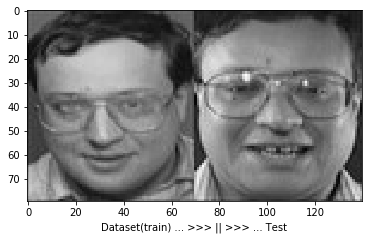

True


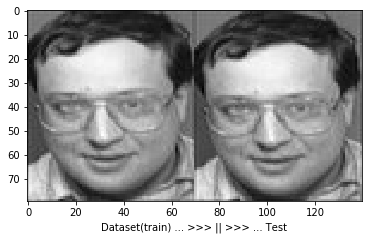

True


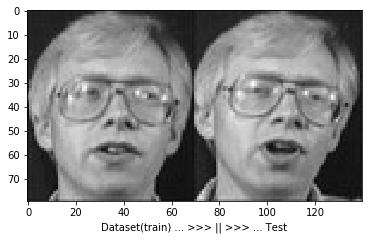

True


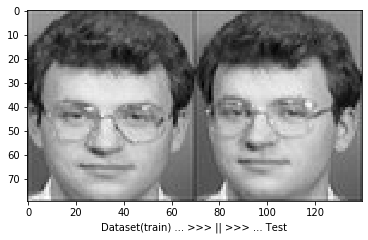

True


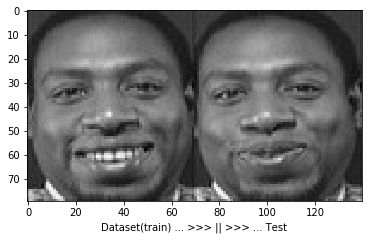

True


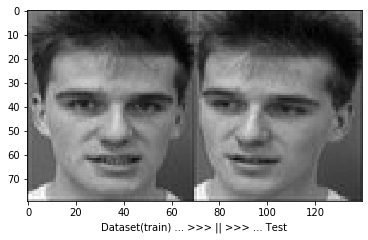

True


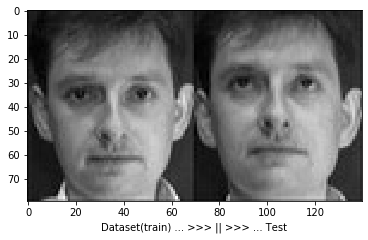

True


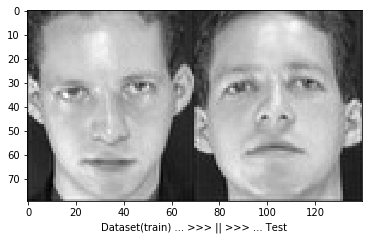

True


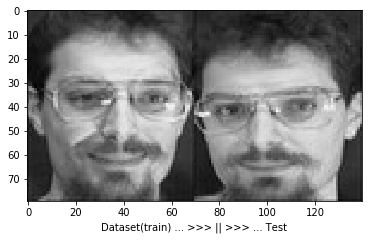

True


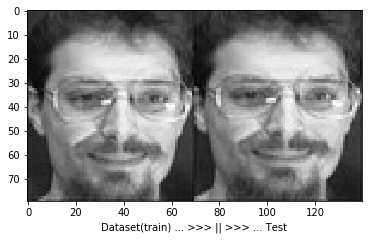

True


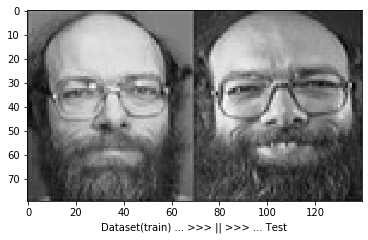

True


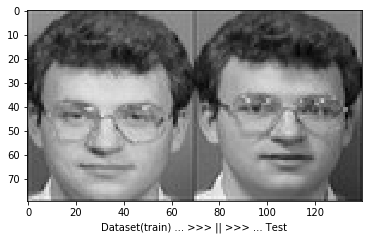

True


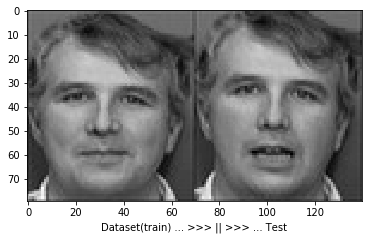

True


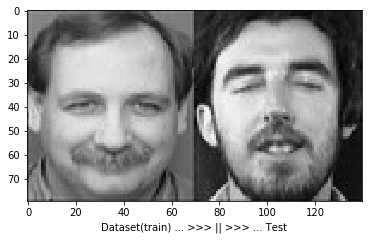

False


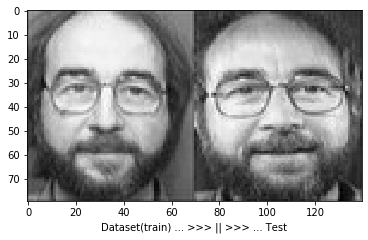

True


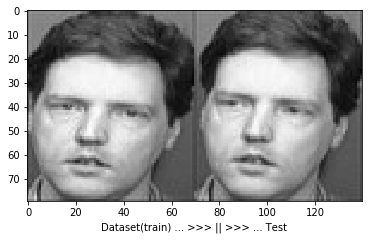

True


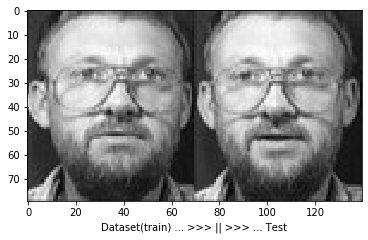

True


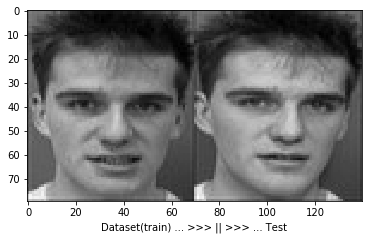

True


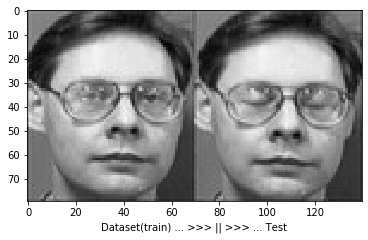

True


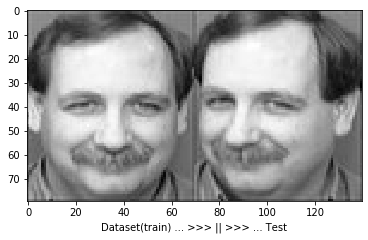

True


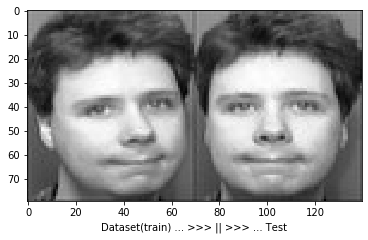

True


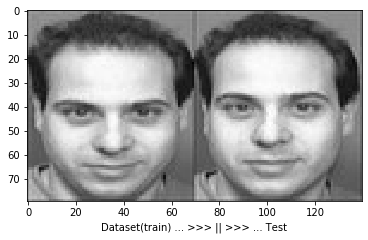

True


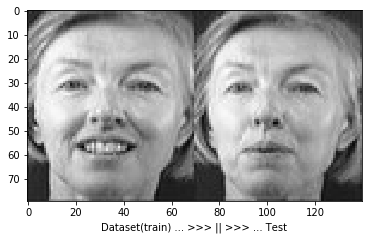

True


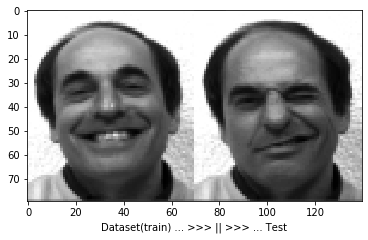

True


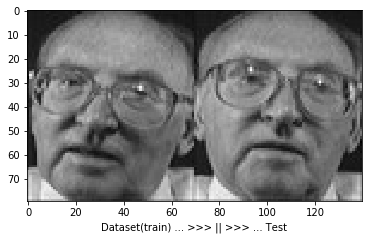

True


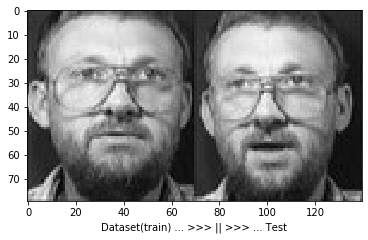

True


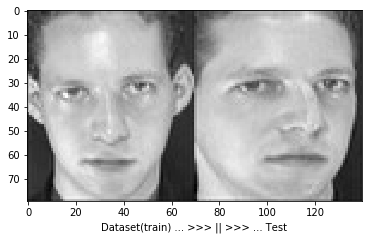

True


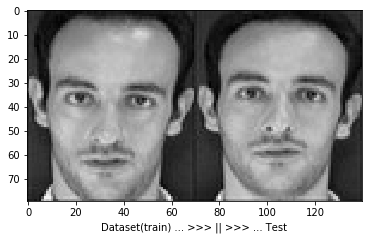

True


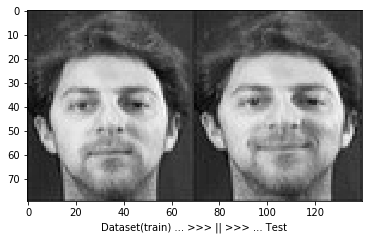

True


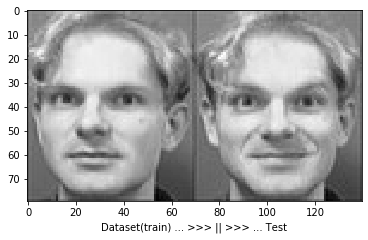

True


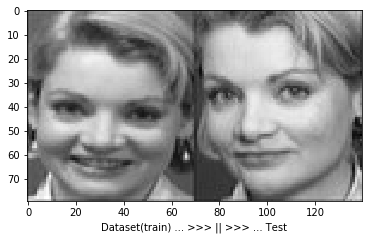

True


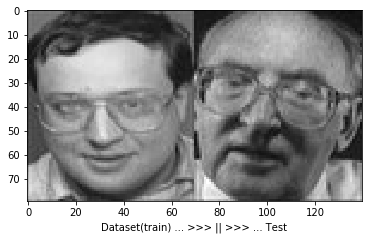

False


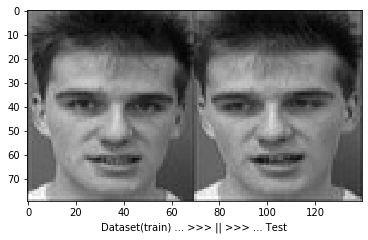

True


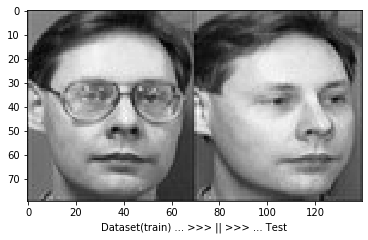

True


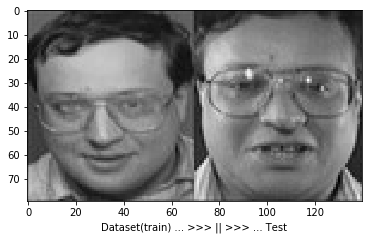

True


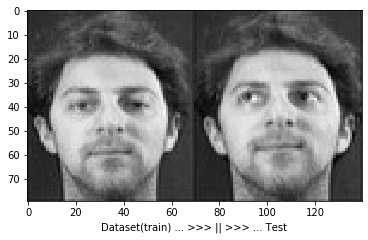

True


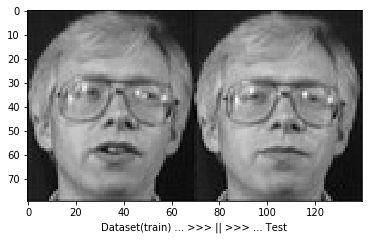

True


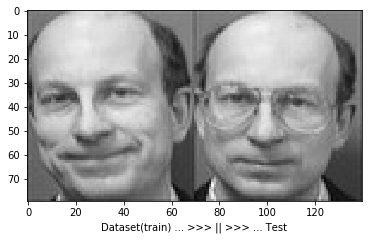

True


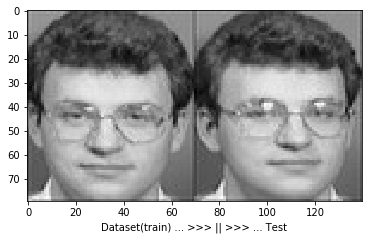

True


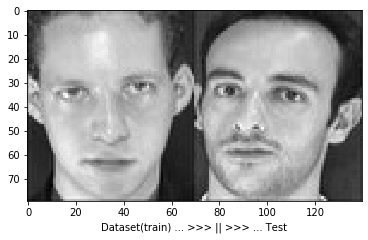

False


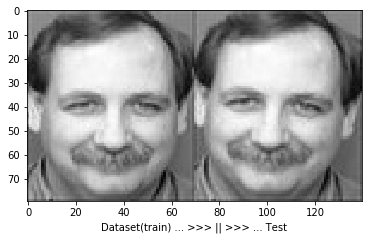

True


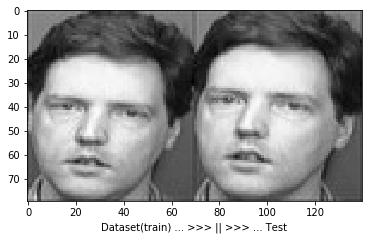

True


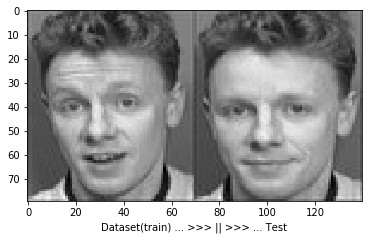

True


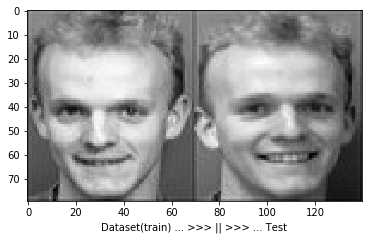

True


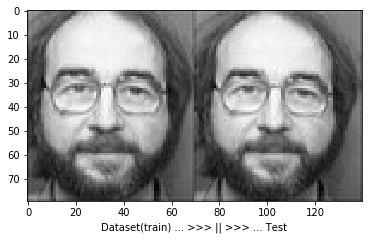

True


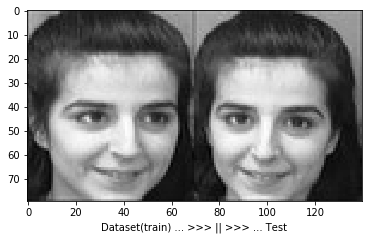

True


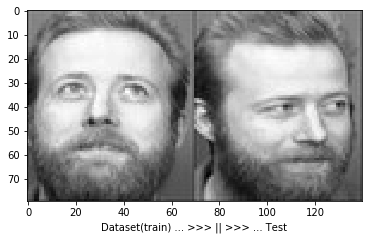

True


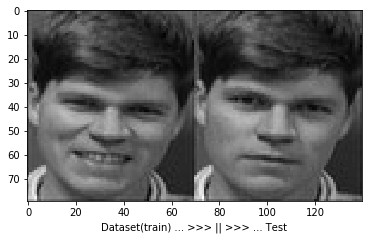

True


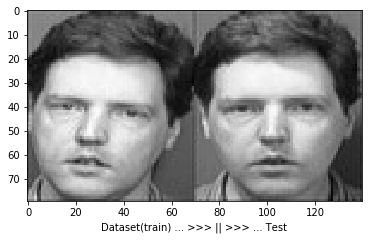

True


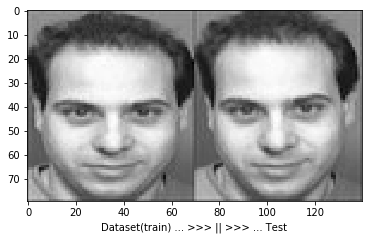

True


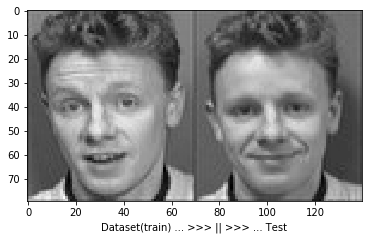

True


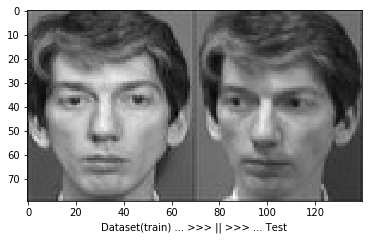

True


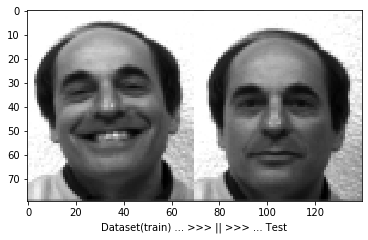

True


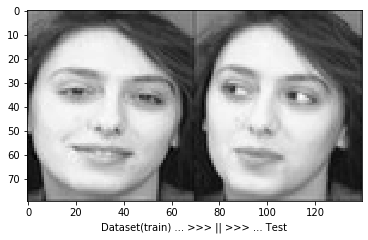

True


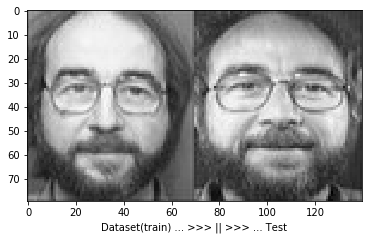

True


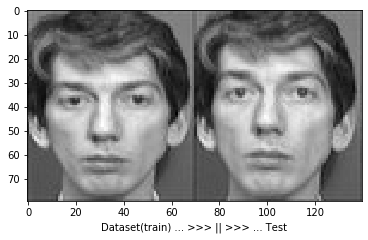

True


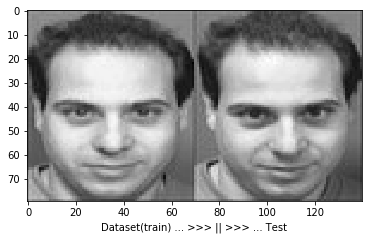

True


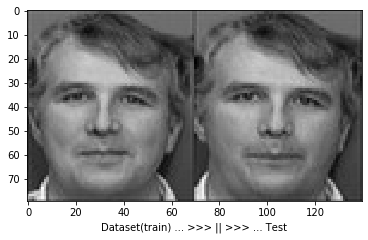

True


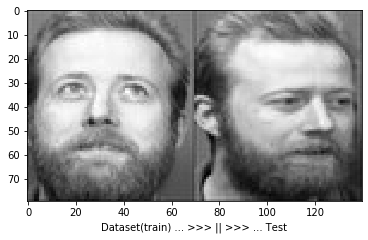

True


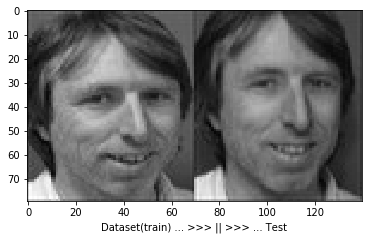

True


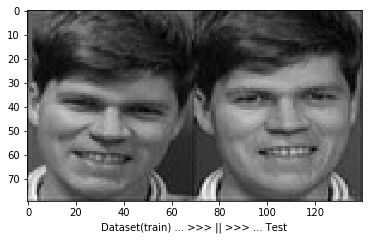

True


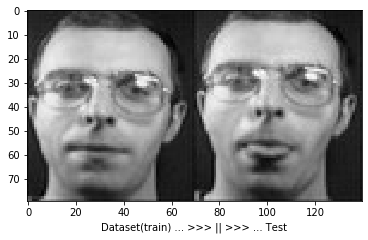

True


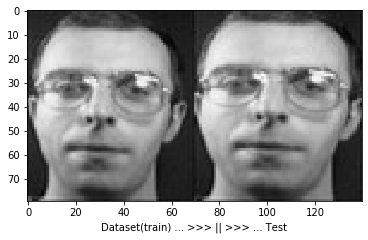

True


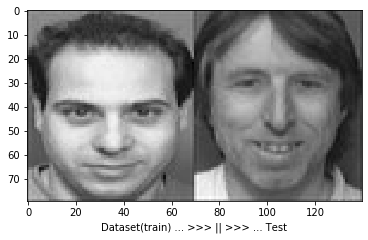

False


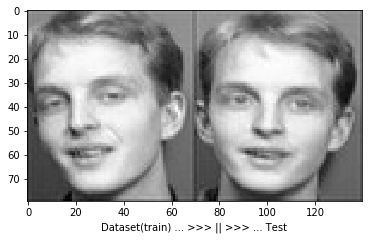

True


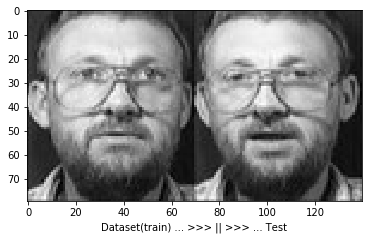

True


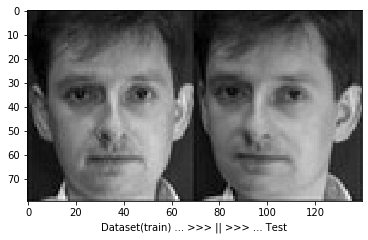

True


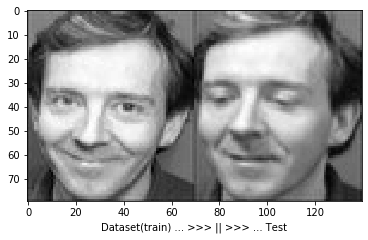

True


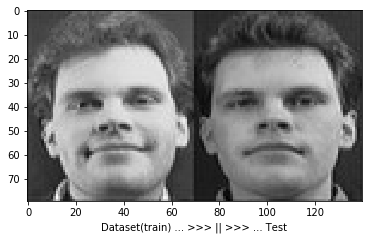

True


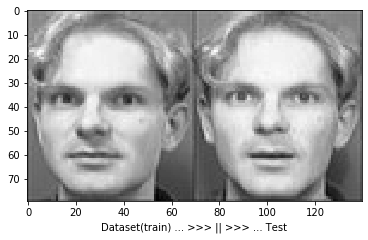

True


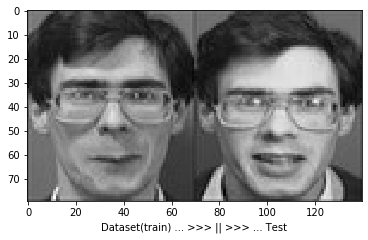

True


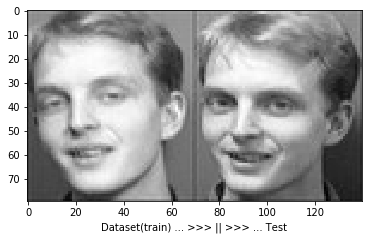

True


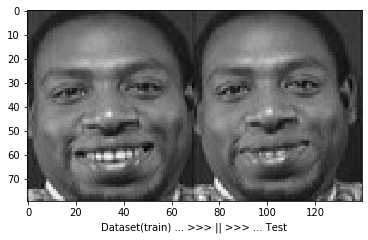

True


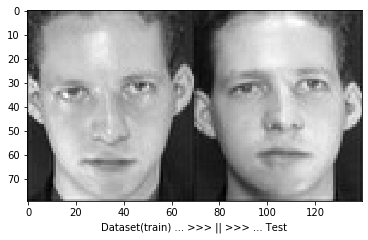

True


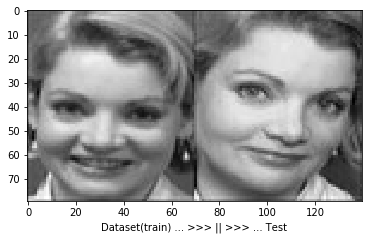

True


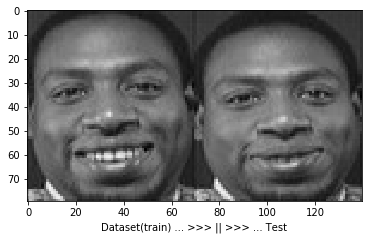

True


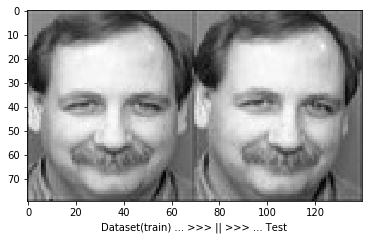

True


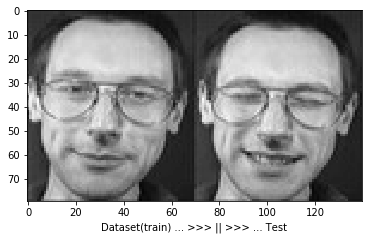

True


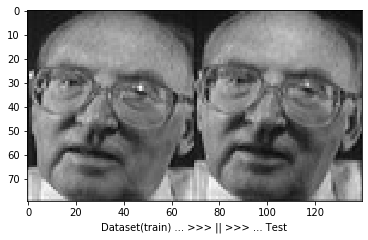

True


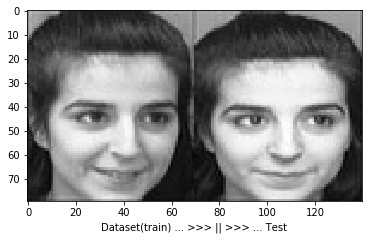

True


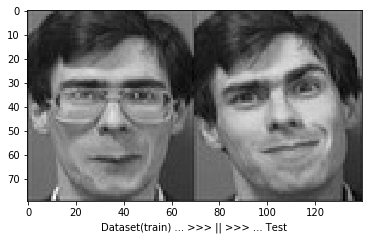

True


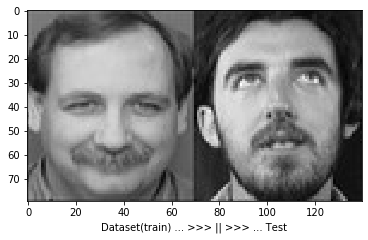

False


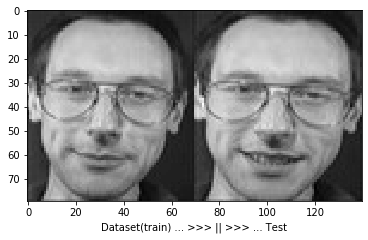

True


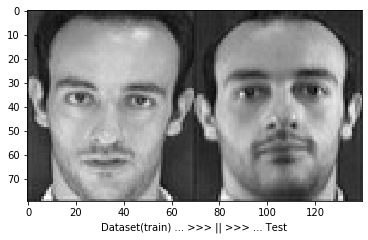

True


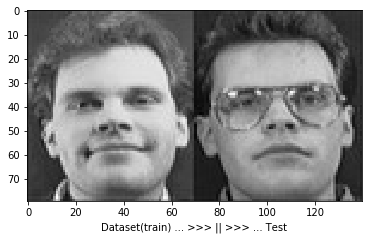

True


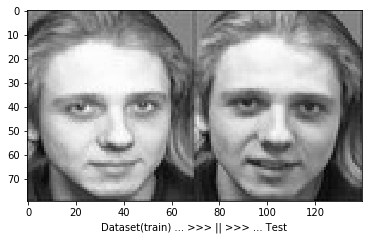

True


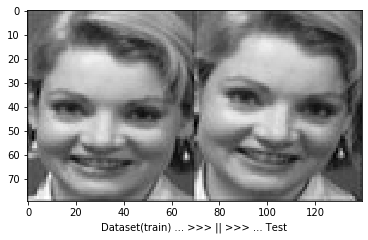

True


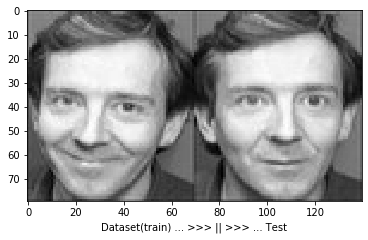

True


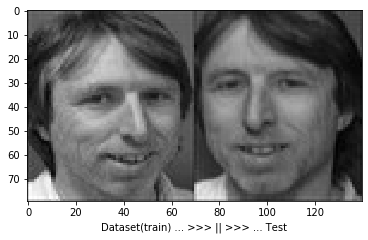

True


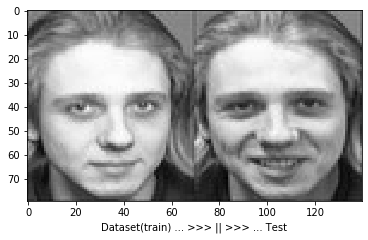

True


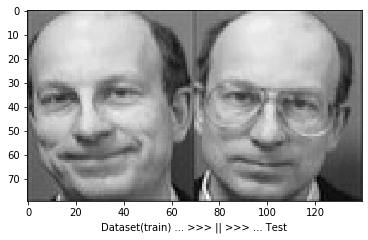

True


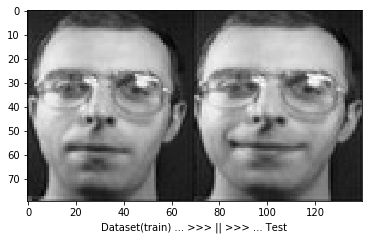

True


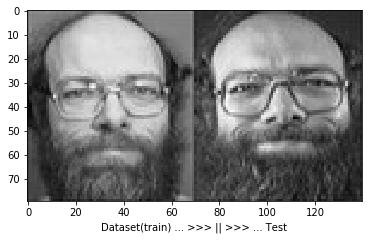

True


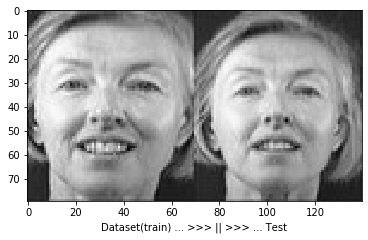

True


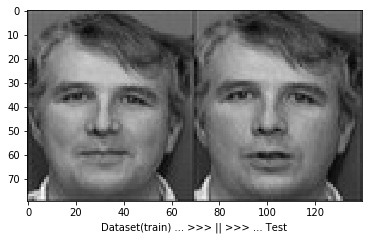

True


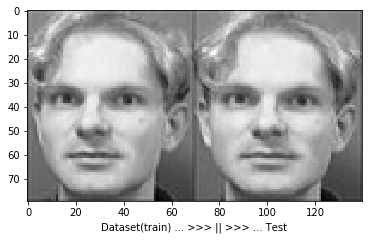

True


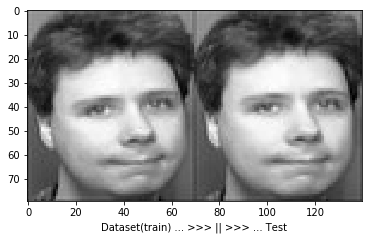

True


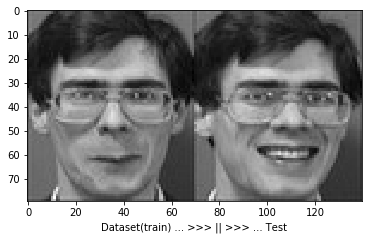

True


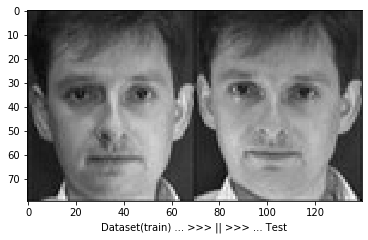

True


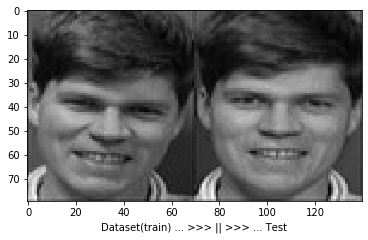

True


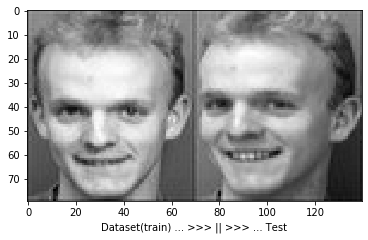

True


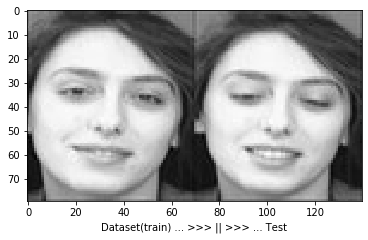

True


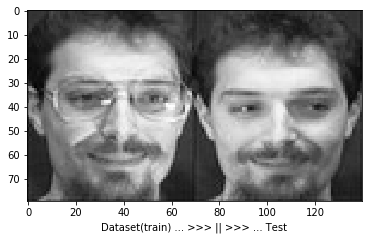

True
Test Size(%) >>>> 0.25 || Accuracy >>>>> 0.9514563106796117


In [22]:
#To choose 0.25 test size
test_size = 0.25
X_Train, X_Test, y_Train, y_Test, indices_Train, indices_Test, = train_test_split(
                                                                                    df.iloc[:,:-1], 
                                                                                    df.iloc[:,-1], 
                                                                                    np.arange(df.shape[0]), 
                                                                                    test_size=test_size, stratify=y, 
                                                                                    # random_state=42 
                                                                                    )
#Train Q, B = procrustes(X, files)
Q, B = procrustes(X_Train, y_Train)
y_result = []
for ind in  X_Test.index:
    y_result.append(predictprocrutes(Q, B, ind))
#To check accuracy of model
y_result = pd.Series(np.asarray(y_result, dtype='int'))
print(f"Test Size(%) >>>>", test_size,"|| Accuracy >>>>>", accuracy_score(y_result, np.asarray(y_Test, dtype='int')))